<a href="https://colab.research.google.com/github/RaghuMariswamegowda/AdEase_TimeSeries/blob/main/AdEase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**
**We are provided with the data of 145k wikipedia pages for 550 days and daily view count for each of them. Our clients belong to different regions and need data on how their ads will perform on pages in different languages.**

# **Objectives**


*   **Forecasting the number views for rach language that helps in predicting
and optimizing the ad placement for clients.**
*   **Compare the three learning algorithms**
*   **Find out which language most affects the ad placements**

We will be using 3 learning algorithems
1. ARIMA
2. SARIMAX

3. Facebook Prophet












In [ ]:
# Importing basic libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Importing data

train = pd.read_csv("https://drive.usercontent.google.com/download?id=1qQkymAitU6l2pSe702rDUhQpoP8MUZXl&export=download&authuser=0&confirm=t&uuid=898b27ba-48ce-43aa-a177-e10abef9797b&at=APZUnTUq2ay4M2qKJ9Jvyiex28lp:1708138813180")

In [ ]:
train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


# **EDA**

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [ ]:
# Dimensions of Data

train.shape

(145063, 551)

In [ ]:
# Checking Null values

train.isnull().sum()

Page              0
2015-07-01    20740
2015-07-02    20816
2015-07-03    20544
2015-07-04    20654
              ...  
2016-12-27     3701
2016-12-28     3822
2016-12-29     3826
2016-12-30     3635
2016-12-31     3465
Length: 551, dtype: int64

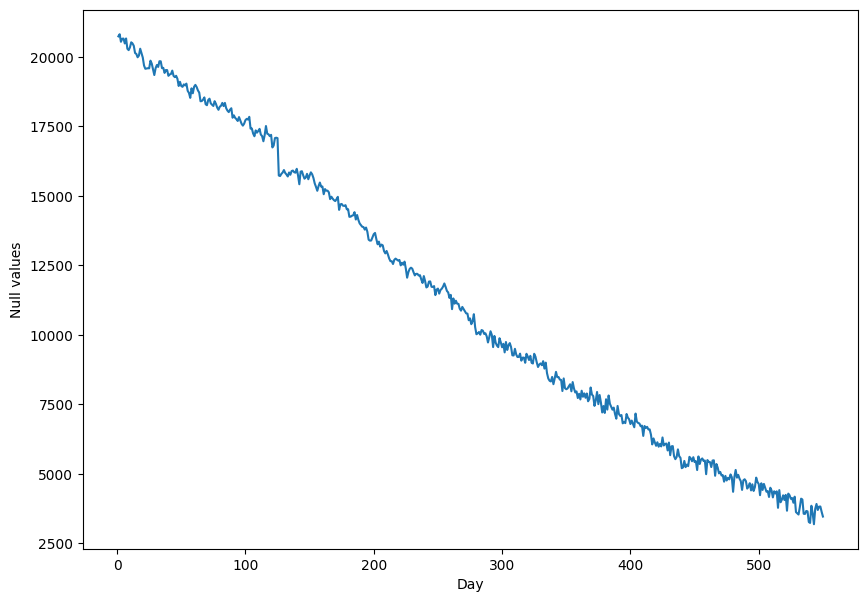

In [ ]:
# Count of Null values over tha days

days = [d for d in range(1,len(train.columns))]
plt.figure(figsize = (10,7))
plt.xlabel("Day")
plt.ylabel("Null values")
plt.plot(days, train.isnull().sum()[1:])

**From the above graph, it is abserved that, as days passed, null values decreased. It might be due to, initially all the wiki pages were not launched and they were launched as days passed.**

In [ ]:
# Dropping wikipages which has more than 300 null values. Because data is not sufficinet for forecasting

train = train.dropna(how = 'all')
train = train.dropna(thresh = 300)

In [ ]:
# Dimensions of data after dropping some of the wiki pages.

train.shape

(133617, 551)

In [ ]:
# Replacing Null values by 0.
# Since Null values are because of no such wiki pages in early days, replacing those values by mean value leads to incorrect prediction.

train = train.fillna(0)

In [ ]:
train.isnull().sum()

Page          0
2015-07-01    0
2015-07-02    0
2015-07-03    0
2015-07-04    0
             ..
2016-12-27    0
2016-12-28    0
2016-12-29    0
2016-12-30    0
2016-12-31    0
Length: 551, dtype: int64

In [ ]:
df = train.copy()

**Data Formmating**
Page format--> SPECIFIC NAME.wikipedia.org_ACCESS TYPE_ACCESS ORIGIN
--->Separating it into Language, access type & access origin

In [ ]:
# Data formating
import re
def lang(Page):
  val = re.search('[A-Za-z]{2}.wikipedia.org_',Page)
  if val:
    return val[0][0:2]

  return 'no_lang'

df['Language'] = df['Page'].apply(lambda x: lang(str(x)))

In [ ]:
# count of each langauge or Number of wiki pages in each language

df["Language"].value_counts()

Language
en         22486
ja         19295
de         17362
fr         16948
zh         15211
no_lang    14494
ru         14270
es         13551
Name: count, dtype: int64

<ipython-input-16-790ed502b4a0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = "Language", palette = 'Set1')


<Axes: xlabel='Language', ylabel='count'>

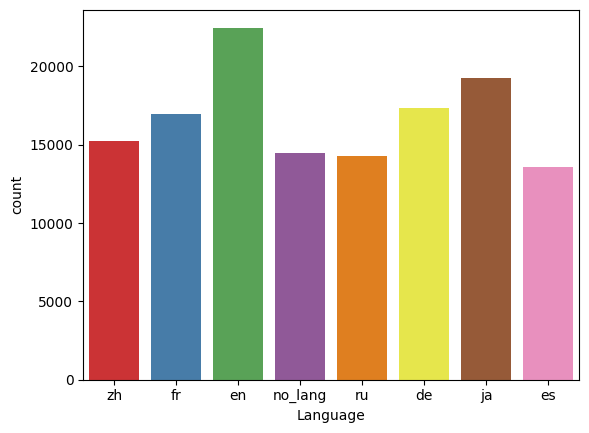

In [ ]:
# Count of each language or number of wiki pages in each language.

sns.countplot(data = df, x = "Language", palette = 'Set1')

In [ ]:

df.groupby('Language').count()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
Language,,,,,,,,,,,,,,,,,,,,,
de,17362,17362,17362,17362,17362,17362,17362,17362,17362,17362,...,17362,17362,17362,17362,17362,17362,17362,17362,17362,17362
en,22486,22486,22486,22486,22486,22486,22486,22486,22486,22486,...,22486,22486,22486,22486,22486,22486,22486,22486,22486,22486
es,13551,13551,13551,13551,13551,13551,13551,13551,13551,13551,...,13551,13551,13551,13551,13551,13551,13551,13551,13551,13551
fr,16948,16948,16948,16948,16948,16948,16948,16948,16948,16948,...,16948,16948,16948,16948,16948,16948,16948,16948,16948,16948
ja,19295,19295,19295,19295,19295,19295,19295,19295,19295,19295,...,19295,19295,19295,19295,19295,19295,19295,19295,19295,19295
no_lang,14494,14494,14494,14494,14494,14494,14494,14494,14494,14494,...,14494,14494,14494,14494,14494,14494,14494,14494,14494,14494
ru,14270,14270,14270,14270,14270,14270,14270,14270,14270,14270,...,14270,14270,14270,14270,14270,14270,14270,14270,14270,14270
zh,15211,15211,15211,15211,15211,15211,15211,15211,15211,15211,...,15211,15211,15211,15211,15211,15211,15211,15211,15211,15211


In [ ]:
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Language
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0,zh
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0,zh
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0,zh
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0,zh
5,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,27.0,8.0,17.0,32.0,19.0,23.0,17.0,17.0,50.0,zh


In [ ]:
# Mean number of clicks for each language on each day

df = df.drop("Page", axis = 1)
df_language = df.groupby("Language").mean().transpose()



In [ ]:
df_language.head()

Language,de,en,es,fr,ja,no_lang,ru,zh
2015-07-01,763.765926,3767.328604,1127.485204,499.092872,614.637160,102.733545,663.199229,272.498521
2015-07-02,753.362861,3755.158765,1077.485425,502.297852,705.813216,107.663447,674.677015,272.906778
2015-07-03,723.074415,3565.225696,990.895949,483.007553,637.451671,101.769629,625.329783,271.097167
2015-07-04,663.537323,3711.782932,930.303151,516.275785,800.897435,86.853871,588.171829,273.712379
2015-07-05,771.358657,3833.433025,1011.759575,506.871666,768.352319,96.254105,626.385354,291.977713


In [ ]:
df_language.reset_index(inplace = True)
df_language.set_index('index', inplace = True)

Text(0, 0.5, 'views per page')

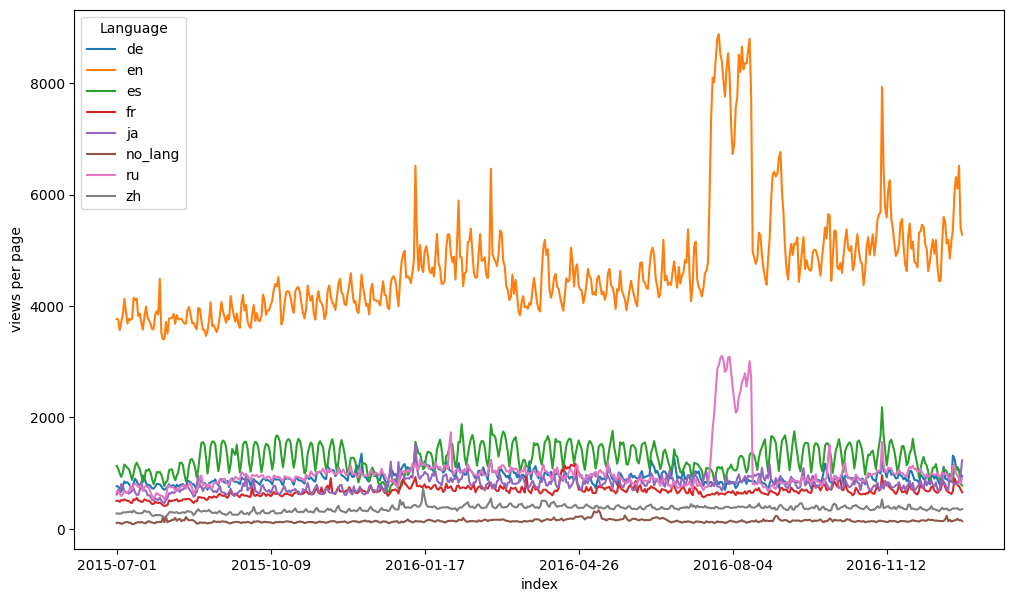

In [ ]:
# Mean number of views Vs Days

df_language.plot(figsize = (12,7))
plt.ylabel("views per page")

# **Checking stationarity**

**Since ARIMA and SARIMAX algorithems considers autocorrelation for developing the model, time series data should be stationary**

In [ ]:
# Checking the stationarity using "Dickey Fuller Test"

from statsmodels.tsa.stattools import adfuller

def df_test(x):
  result = adfuller(x)
  print('ADF Statististics:%f'%result[0])
  print('p_value: %f'%result[1])

total_view = df_language.copy()
df_test(total_view['en'])

ADF Statististics:-2.373563
p_value: 0.149337




* Since p > 5%, series is not stationary






**Here models will be developed for predicting number of views for English language only**


**Making it stationary**

In [ ]:
total_view = df_language.copy()

In [ ]:
ts = total_view["en"]

# **Time Series Decomposition**

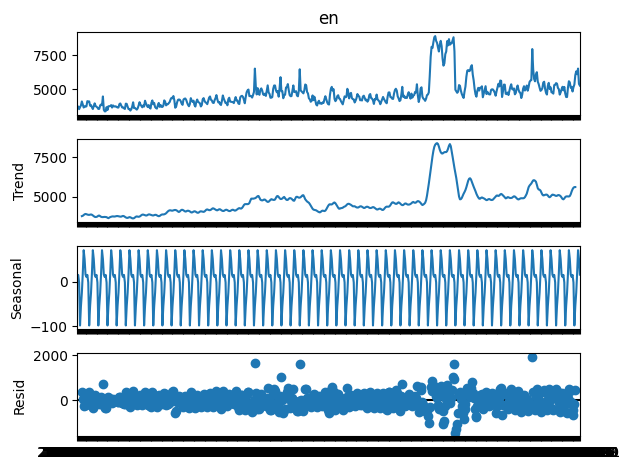

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

tsn = pd.Series(total_view['en'],index = total_view.index)

decomposition = sm.tsa.seasonal_decompose(tsn, model = "additive", period = 10)

decomposition.plot()
plt.show()

# **Removing seasonality & trend using defferencing**

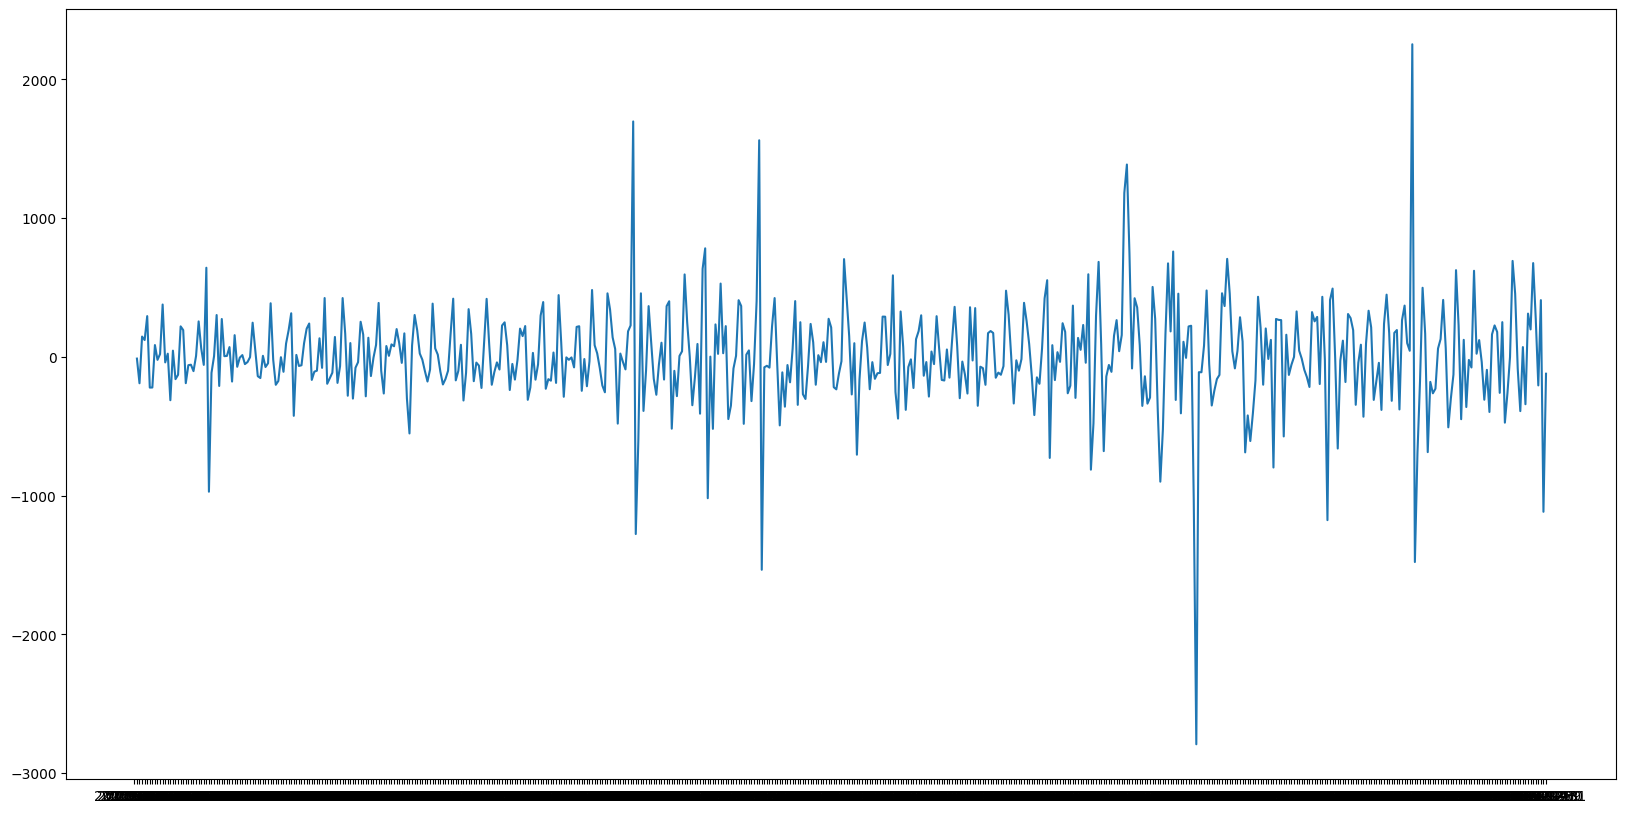

In [ ]:
ts_diff = ts - ts.shift(1)
plt.figure(figsize = (20,10))
plt.plot(ts_diff)
plt.show()

**Now, time series is stationary**

In [ ]:
# Checking stationarity using Dickey Fuller Test

ts_diff.dropna(inplace = True)
df_test(ts_diff)

ADF Statististics:-8.273590
p_value: 0.000000


**Now P value is 0, it is stationaryt**




# **Auto correlation & Partial Autocorrelation Plots**

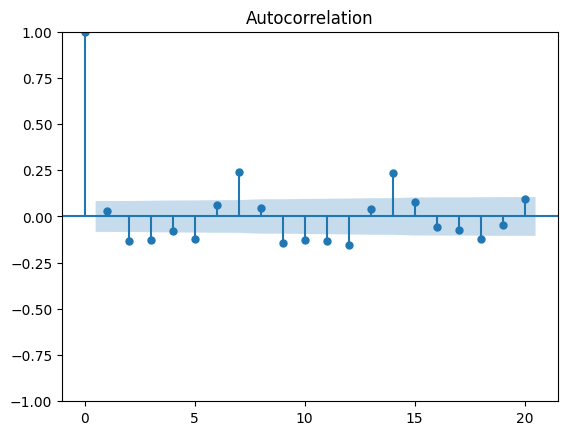

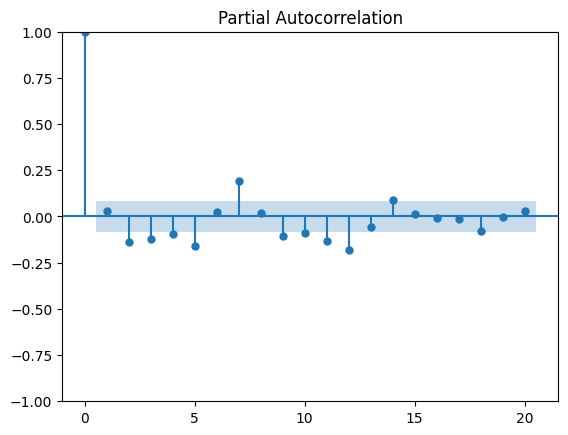

In [ ]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf = plot_acf(ts_diff,lags = 20)
pacf = plot_pacf(ts_diff, lags = 20)


**Conclusions from the above graphs**

*   There is existence of seasonality.
*   Every 7th lag has high correlation with current value, hence seasonality is 7
* p = 5(Number of Autoregressive lags)



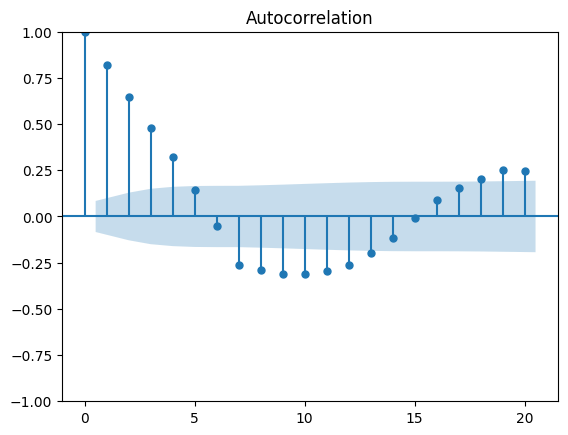

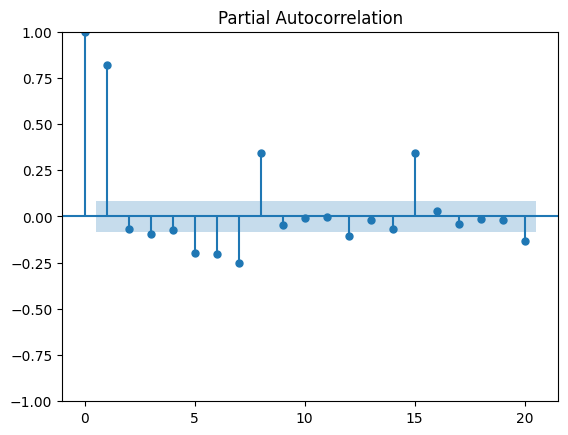

In [ ]:
ts_diff = ts - ts.shift(7)
ts_diff.dropna(inplace = True)
acf = plot_acf(ts_diff,lags = 20)
pacf = plot_pacf(ts_diff, lags = 20)

**Train Test Split**

In [ ]:
train = ts[:-30]
test = ts[-30:]

# **ARIMA model**

**Performance Metrics**

In [ ]:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, mean_absolute_percentage_error as mape

def performance(actual, predicted):
  print("MAE:", round(mae(actual, predicted),3))
  print("RMSE:", round(mse(actual, predicted)**0.5,3))
  print("MAPE:", round(mape(actual, predicted),3))

In [ ]:
# Importing ARIMA
from statsmodels.tsa.arima.model import ARIMA
# Importing pandas data frame
from pandas import DataFrame

In [ ]:
# Developing the model for entire data set
model=ARIMA(ts, order = (4,1,3))
model_fit = model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


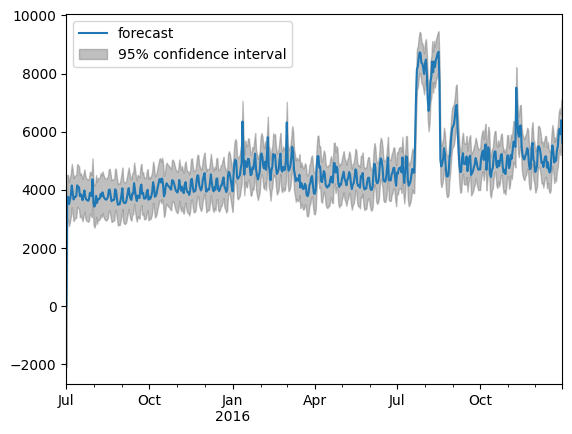

In [ ]:
# Models prediction with 95% confidence interval

from statsmodels.graphics.tsaplots import plot_predict

plot_predict(model_fit,dynamic = False)
plt.show()

**Multistep forecasting**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown key

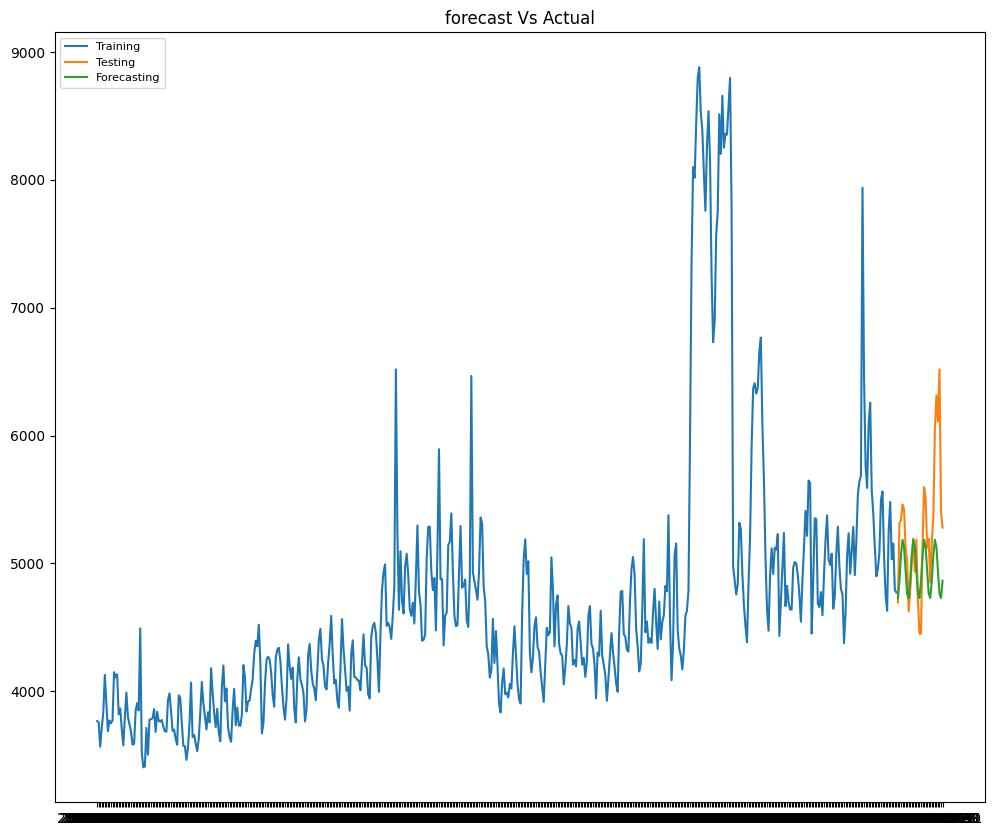

In [ ]:
# Developing the model from the train data

model = ARIMA(train, order = (4,1,3))
fitted = model.fit()

# Forecasting for next 30 periods
fc = fitted.forecast(30, alpha = 0.05) # 95% confidence interval

# Above code returns an array and hence convert it into series
fc_series = pd.Series(fc, index = test.index)

# Plot to compare the predicted values with actual test values
plt.figure(figsize = (12,10), dpi = 100)

plt.plot(train, label = "Training")
plt.plot(test, label = "Testing")
plt.plot(fc_series, label = "Forecasting")

plt.title("forecast Vs Actual")
plt.legend(loc = "upper left", fontsize = 8)


**Performance of ARIMA**

In [ ]:
# Performance of ARIMA model
performance(test, fc)

MAE: 381.32
RMSE: 543.307
MAPE: 0.068


# **SARIMAX**


**S+ARIMA+X:**

**S --> Sesonality --->Takes into account any seasonality pattern.**

**X --> Exogenous variable ---> Takes into account the external factor which impacts my prediction.**

In [ ]:
!gdown https://drive.google.com/file/d/19qvuu7E8yD63o4WkOdy_lLFSrZlZPpuE/view?usp=drive_link    #1H9054 - eVP9IdANPOb1XwX7Nd2r_Sjf1u

#exog = pd.read_csv(raise"https://drive.google.com/file/d/19qvuu7E8yD63o4WkOdy_lLFSrZlZPpuE/view?usp=drive_link")

/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=19qvuu7E8yD63o4WkOdy_lLFSrZlZPpuE
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/19qvuu7E8yD63o4WkOdy_lLFSrZlZPpuE/view?usp=drive_link
To: /content/view?usp=drive_link
82.2kB [00:00, 3.50MB/s]


In [ ]:
#exog = pd.read_csv('view?usp=drive_link')

exog_df = pd.read_csv("https://drive.google.com/uc?id=19qvuu7E8yD63o4WkOdy_lLFSrZlZPpuE")

In [ ]:
exog_df.head()

,Exog
0,0
1,0
2,0
3,0
4,0


In [ ]:
#exog_df.shape
exog_df.shape
#exog = exog_df['Exog'].to_numpy()

(550, 1)

In [ ]:
exog = exog_df['Exog'].to_numpy()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimiz

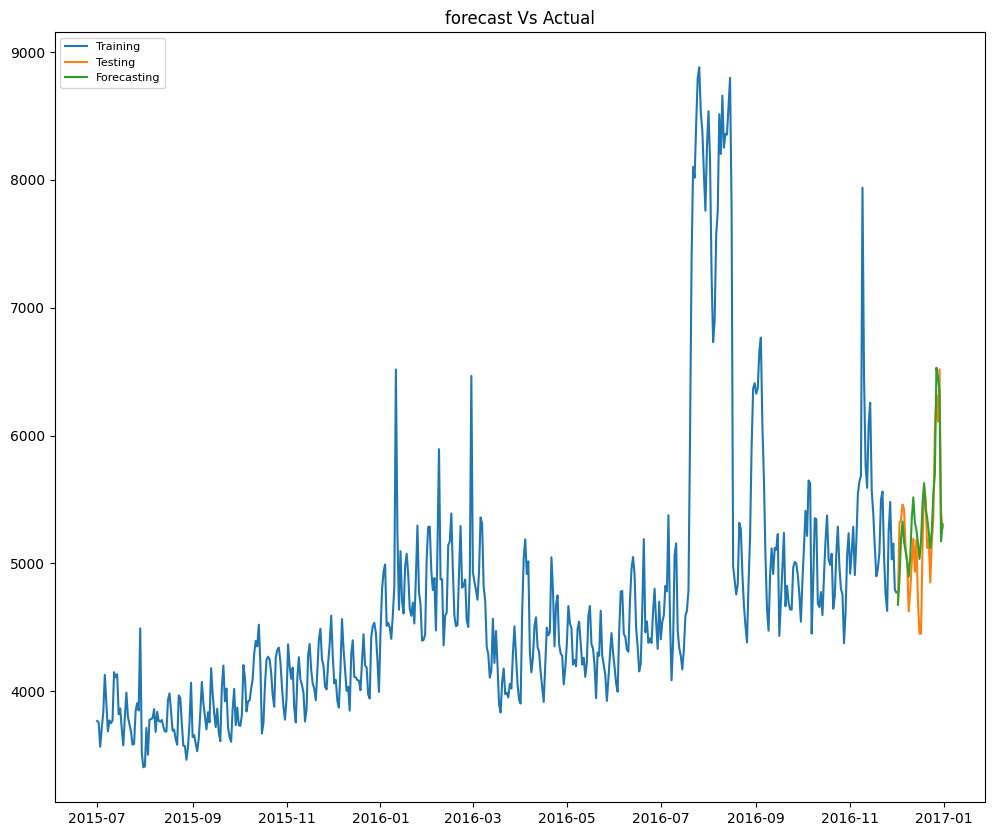

In [ ]:
# Developing SARIMAX model
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(train, exog = exog[:-30], order = (4,1,3), seasonal_order = (1,1,1,7))
results = model.fit()

fc = results.forecast(30, exog = pd.DataFrame(exog[-30:]))

# Pandas series
fc_series = pd.Series(fc)

# Plot
plt.figure(figsize = (12,10), dpi = 100)

train.index = train.index.astype('datetime64[ns]')
test.index = test.index.astype('datetime64[ns]')

plt.plot(train, label = "Training")
plt.plot(test, label = "Testing")
plt.plot(fc_series, label = "Forecasting")

plt.title("forecast Vs Actual")
plt.legend(loc = "upper left", fontsize = 8)


**Performance of SARIMAX**

In [ ]:
performance(test, fc)


MAE: 235.208
RMSE: 291.105
MAPE: 0.046


# Facebook Prophet

In [ ]:
ts.head()

index
2015-07-01    3767.328604
2015-07-02    3755.158765
2015-07-03    3565.225696
2015-07-04    3711.782932
2015-07-05    3833.433025
Name: en, dtype: float64

In [ ]:
ts_new = ts.reset_index()

In [ ]:
ts_new["holiday"] = exog_df["Exog"]

In [ ]:
ts_new.rename({"index":"ds", "en":"y"}, axis = 1, inplace = True)
ts_new.head()

,ds,y,holiday
0,2015-07-01,3767.328604,0
1,2015-07-02,3755.158765,0
2,2015-07-03,3565.225696,0
3,2015-07-04,3711.782932,0
4,2015-07-05,3833.433025,0


**fbprophet without exog data**

In [ ]:
# Importing fbprophet
from prophet import Prophet

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6qp4xwpj/ujuqtxsd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6qp4xwpj/2qsen971.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64014', 'data', 'file=/tmp/tmp6qp4xwpj/ujuqtxsd.json', 'init=/tmp/tmp6qp4xwpj/2qsen971.json', 'output', 'file=/tmp/tmp6qp4xwpj/prophet_model1gaxe9fc/prophet_model-20240424020403.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:04:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:04:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


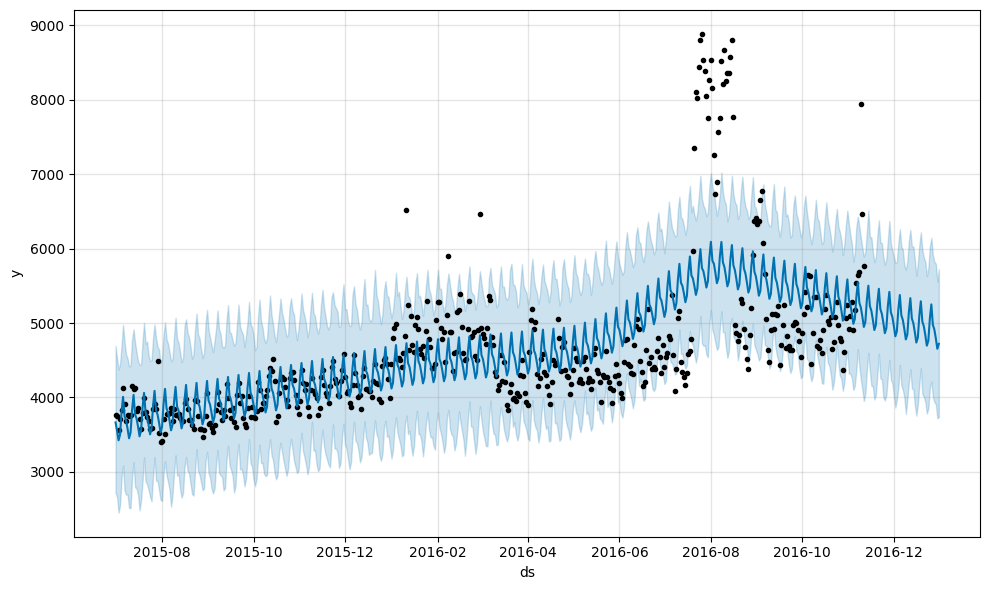

In [ ]:
m = Prophet()
m.fit(ts_new.loc[:,["ds","y"]][:-50])
future = m.make_future_dataframe(periods = 50, freq = "D")
forecast = m.predict(future)
m.plot(forecast);

In [ ]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [ ]:
forecast["yhat"].head()

0    3664.873212
1    3553.829276
2    3424.749742
3    3501.313826
4    3807.371397
Name: yhat, dtype: float64

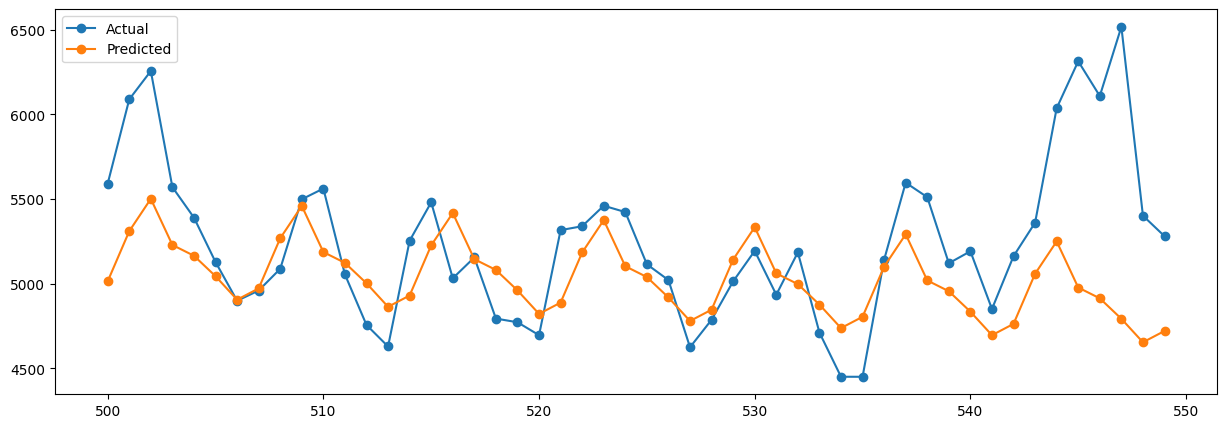

In [ ]:
ts_new["y"][-50:].plot(style = '-o', figsize = (15,5), label = "Actual")
forecast["yhat"][-50:].plot(style = '-o', figsize = (15,5), label = "Predicted")
plt.legend()

In [ ]:
# Performace of the model

performance(ts_new["y"][-50:], forecast["yhat"][-50:])


MAE: 336.869
RMSE: 481.074
MAPE: 0.061


**fbprophet with exogenous variable**

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6qp4xwpj/rlqu74df.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6qp4xwpj/6mwtc7z9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41698', 'data', 'file=/tmp/tmp6qp4xwpj/rlqu74df.json', 'init=/tmp/tmp6qp4xwpj/6mwtc7z9.json', 'output', 'file=/tmp/tmp6qp4xwpj/prophet_modelz70hrzkc/prophet_model-20240424023848.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:38:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:38:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


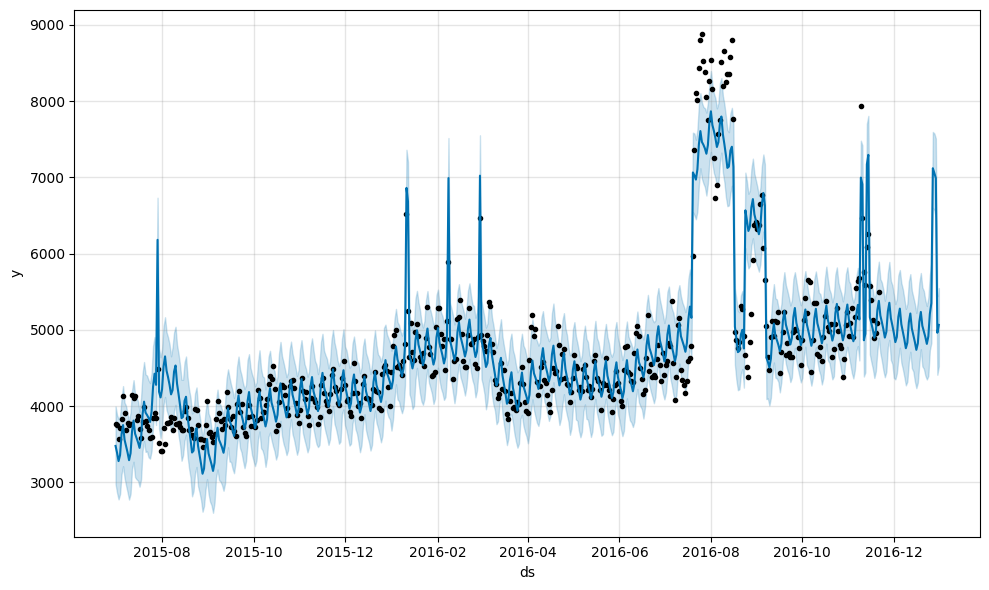

In [ ]:
m2 = Prophet(yearly_seasonality = True, weekly_seasonality = True)
m2.add_regressor("holiday") # adding holidays data in the m2
m2.fit(ts_new[:-40])
forecast2 = m2.predict(ts_new)
fig = m2.plot(forecast2)

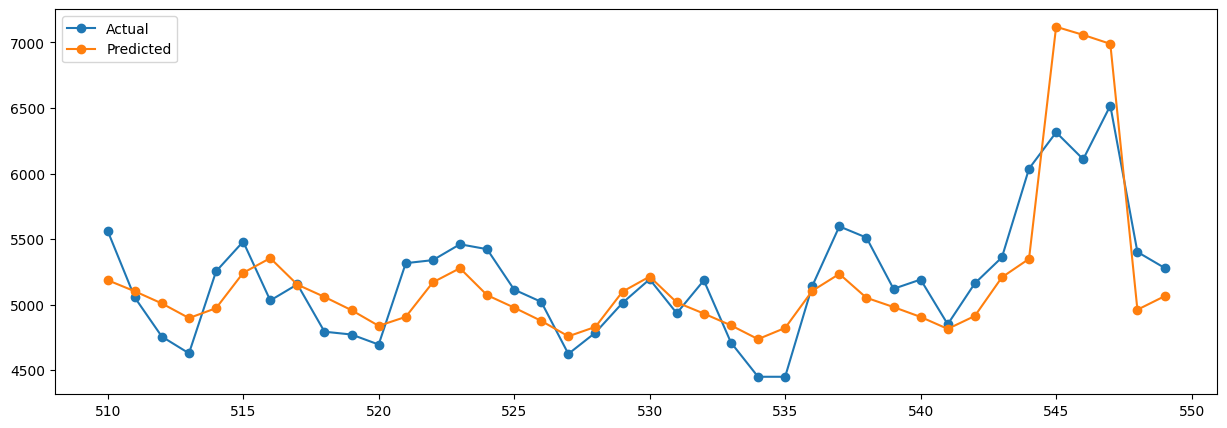

In [ ]:
# Comaprision of Predicted values with comparsion
ts_new["y"][-40:].plot(style = '-o', figsize = (15,5), label = "Actual")
forecast2["yhat"][-40:].plot(style = '-o', figsize = (15,5), label = "Predicted")
plt.legend()

In [ ]:
# Performace of the model

performance(ts_new["y"][-40:], forecast2["yhat"][-40:])

MAE: 261.882
RMSE: 331.224
MAPE: 0.049
